In [20]:
import pandas as pd

dtw = pd.read_csv('DTW_prec.csv', header='infer' ) 
dtw.index = pd.to_datetime(dtw['DATE'])
dtw = dtw.drop(['DATE'],axis=1)
dtw.head()

,PRCP
DATE,
2001-01-01,0.00
2001-01-02,0.00
2001-01-03,0.00
2001-01-04,0.04
2001-01-05,0.14


In [21]:
import numpy as np

N,d = dtw.shape
delta1 = dtw

In [22]:
meanValue = delta1.mean()
covValue = delta1.cov()
print(meanValue)
print(covValue)

PRCP    0.081197
dtype: float64
         PRCP
PRCP  0.05305


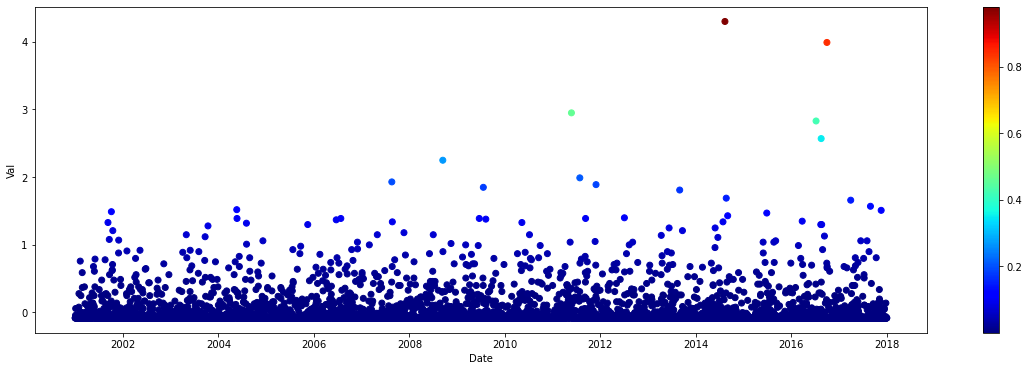

In [23]:
from numpy.linalg import inv
import matplotlib.pyplot as plt
X = delta1.values
S = covValue.values
for i in range(1):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(20,6))
#ax = fig.add_subplot(111, projection='3d')
p = plt.scatter(delta1.index,delta1.PRCP,c=anomaly_score,cmap='jet')
plt.ylabel('Val')
plt.xlabel('Date')
plt.colorbar(p)
plt.show()

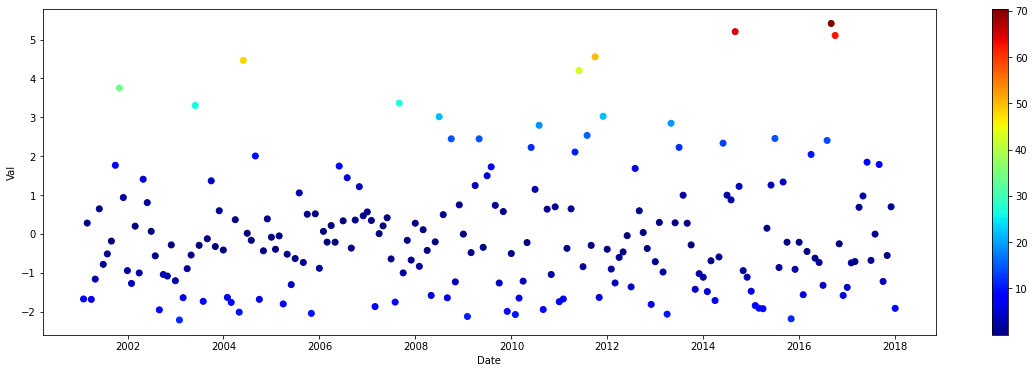

In [25]:
monthly = delta1.groupby(pd.Grouper(freq='M')).sum()
meanValue = monthly.mean()
covValue = monthly.cov()
X = monthly.values
S = covValue.values
for i in range(1):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(20,6))
#ax = fig.add_subplot(111, projection='3d')
p = plt.scatter(monthly.index,monthly.PRCP,c=anomaly_score,cmap='jet')
plt.ylabel('Val')
plt.xlabel('Date')
plt.colorbar(p)
plt.show()



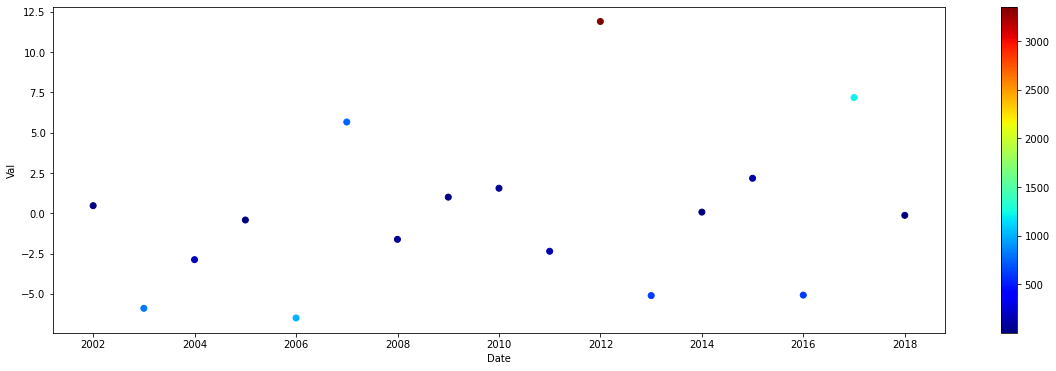

In [14]:
year = delta1.groupby(pd.Grouper(freq='Y')).sum()
meanValue = year.mean()
covValue = year.cov()
X = year.values
S = covValue.values
for i in range(1):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(20,6))
#ax = fig.add_subplot(111, projection='3d')
p = plt.scatter(year.index,year.PRCP,c=anomaly_score,cmap='jet')
plt.ylabel('Val')
plt.xlabel('Date')
plt.colorbar(p)
plt.show()

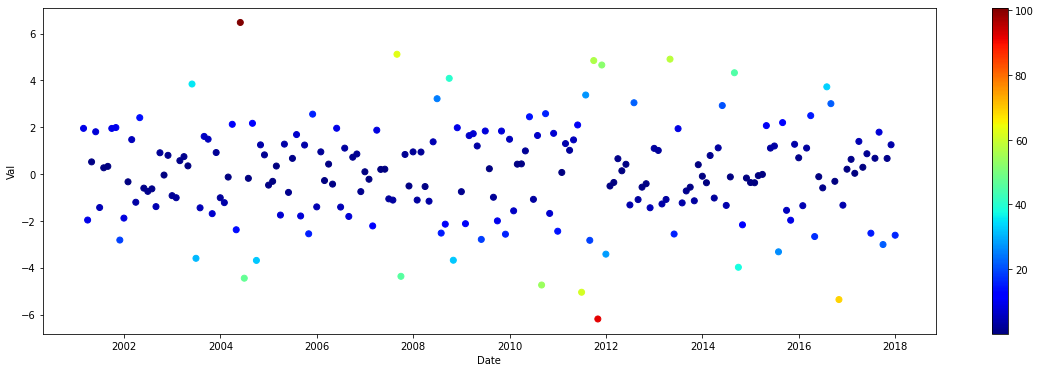

In [26]:
N,d = monthly.shape
meanValue = monthly.mean()
covValue = monthly.cov()
delta2 = pd.DataFrame(monthly.iloc[1:,:].values-monthly.iloc[:N-1,:].values,
                    columns=monthly.columns, index=monthly.iloc[1:].index)
delta2.head()
X = delta2.values
S = covValue.values
for i in range(1):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(20,6))
#ax = fig.add_subplot(111, projection='3d')
p = plt.scatter(delta2.index,delta2.PRCP,c=anomaly_score,cmap='jet')
plt.ylabel('Val')
plt.xlabel('Date')
plt.colorbar(p)
plt.show()

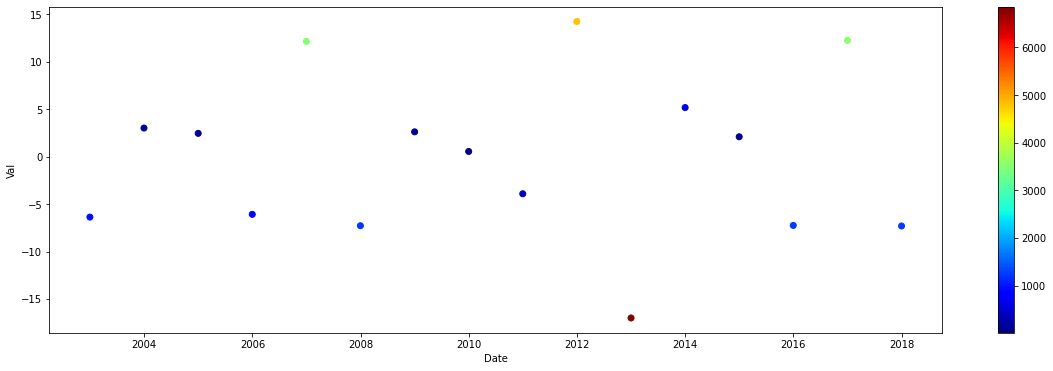

In [28]:
N,d = year.shape
meanValue = year.mean()
covValue = year.cov()
delta2 = pd.DataFrame(year.iloc[1:,:].values-year.iloc[:N-1,:].values,
                    columns=year.columns, index=year.iloc[1:].index)
delta2.head()
X = delta2.values
S = covValue.values
for i in range(1):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(20,6))
#ax = fig.add_subplot(111, projection='3d')
p = plt.scatter(delta2.index,delta2.PRCP,c=anomaly_score,cmap='jet')
plt.ylabel('Val')
plt.xlabel('Date')
plt.colorbar(p)
plt.show()